In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
X_train = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_train_thres_10.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_train_thres_10.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_valid_thres_10.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_valid_thres_10.npy')
X_test = get_features('/users/mtaranov/NN_thres5max_datasets/dist_matched/X_test_thres_10.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max_datasets/dist_matched/y_test_thres_10.npy')

In [6]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [10]:
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)
scores_from_10_iter =[]
for i in range(10):
    validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)
    dnn_normalized.save('dnn_CONV_wo_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :10, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/dnn_CONV_wo_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/dnn_CONV_wo_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :10, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

# pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
# #np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
# pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
# #np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
# pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
# #np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 4.6787Epoch 0: validation loss: 0.763
Balanced Accuracy: 50.00%	 auROC: 0.500	 auPRC: 0.515	 auPRG: -0.049
Recall at 5%|10%|20% FDR: 0.3%|0.3%|0.3%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 4.1537 - val_loss: 0.7627
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.3564Epoch 1: validation loss: 0.651
Balanced Accuracy: 61.58%	 auROC: 0.649	 auPRC: 0.674	 auPRG: 0.218
Recall at 5%|10%|20% FDR: 1.6%|1.6%|30.5%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 1.3280 - val_loss: 0.6513
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.1898Epoch 2: validation loss: 0.630
Balanced Accuracy: 67.04%	 auROC: 0.723	 auPRC: 0.732	 auPRG: 0.469
Recall at 5%|10%|20% FDR: 0.6%|16.4%|31.8%	 Num Positives: 311	 

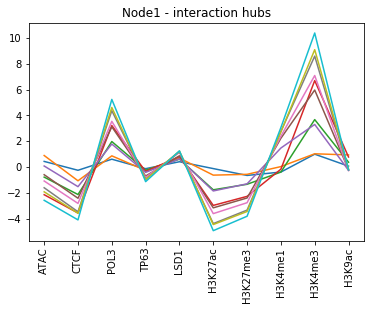

In [25]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - interaction hubs')

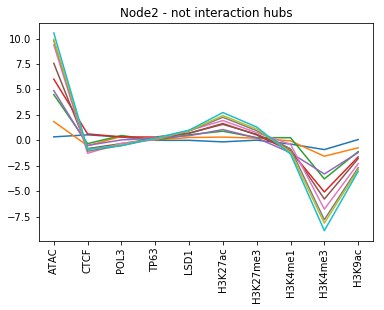

In [26]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - not interaction hubs')

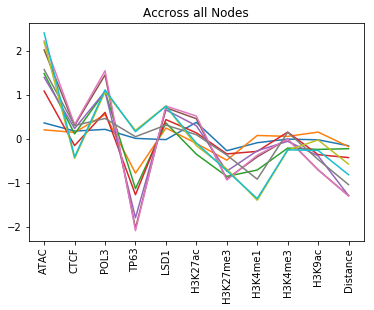

In [43]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

In [29]:
i=0
vmin = np.min(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
vmax = np.max(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
x = [float(i+0.5) for i in range(np.shape(scores)[2])]

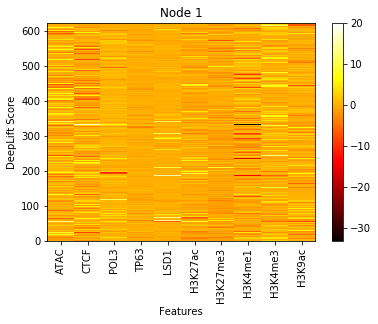

In [33]:
#plt.imshow(scores[:, 0, :, 0], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 0], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

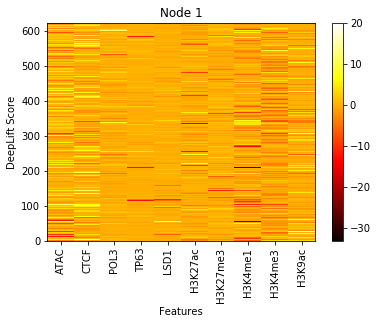

In [34]:
#plt.imshow(scores[:, 0, :, 1], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 1], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

# with genomic locations

In [35]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)
scores_from_10_iter =[]
for i in range(10):
    validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)
    dnn_normalized.save('dnn_CONV_w_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :11, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :11, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/dnn_CONV_w_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/dnn_CONV_w_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :11, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 4.8953Epoch 0: validation loss: 0.634
Balanced Accuracy: 67.04%	 auROC: 0.741	 auPRC: 0.742	 auPRG: 0.513
Recall at 5%|10%|20% FDR: 2.9%|13.2%|31.8%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 4.2688 - val_loss: 0.6343
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.1976Epoch 1: validation loss: 0.610
Balanced Accuracy: 70.90%	 auROC: 0.758	 auPRC: 0.769	 auPRG: 0.546
Recall at 5%|10%|20% FDR: 5.1%|8.7%|58.2%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 1.1877 - val_loss: 0.6099
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.0465Epoch 2: validation loss: 0.585
Balanced Accuracy: 70.58%	 auROC: 0.774	 auPRC: 0.796	 auPRG: 0.569
Recall at 5%|10%|20% FDR: 5.5%|49.5%|58.8%	 Num Positives: 311	

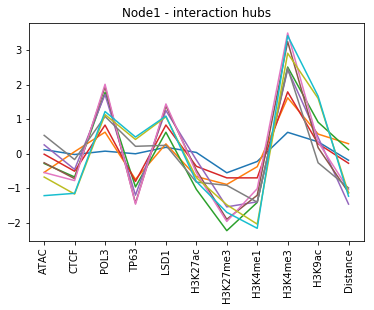

In [39]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'Distance']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - interaction hubs')

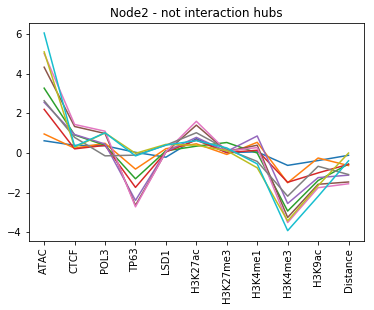

In [40]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - not interaction hubs')

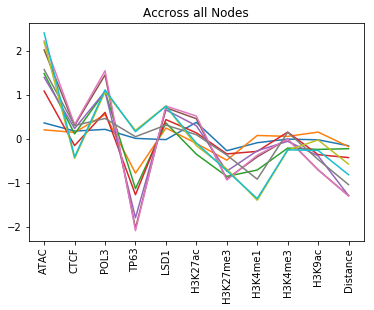

In [42]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

# with distance only

In [67]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)

In [68]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 1212 samples, validate on 622 samples
Epoch 1/100
1000/1212 [=======================>......] - ETA: 0s - loss: 2.2666Epoch 0: validation loss: 0.745
Balanced Accuracy: 57.72%	 auROC: 0.605	 auPRC: 0.588	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 2.1379 - val_loss: 0.7453
Epoch 2/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.3789Epoch 1: validation loss: 0.678
Balanced Accuracy: 57.88%	 auROC: 0.605	 auPRC: 0.587	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num Negatives: 311	 

1212/1212 [==============================] - 0s - loss: 1.3723 - val_loss: 0.6782
Epoch 3/100
1000/1212 [=======================>......] - ETA: 0s - loss: 1.3478Epoch 2: validation loss: 0.690
Balanced Accuracy: 57.88%	 auROC: 0.605	 auPRC: 0.587	 auPRG: 0.175
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 311	 Num 

In [69]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))

Balanced Accuracy: 56.58%	 auROC: 0.576	 auPRC: 0.566	 auPRG: 0.131
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 243	 Num Negatives: 243	 


# Print prediction

In [70]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [71]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [72]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [73]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


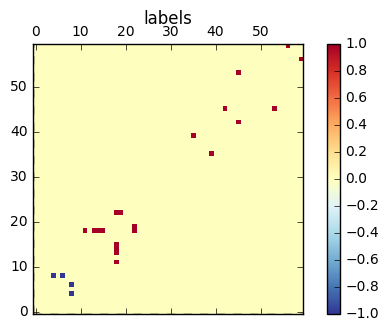

1.0
(60, 60)
Limit: 1.0


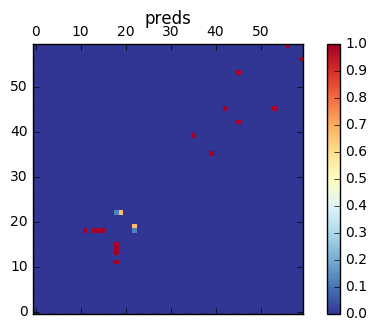

In [74]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )